>Importing the libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

>Importing the Dataset 

In [3]:

df = pd.read_csv("IMDb-Dataset.csv", encoding="latin1")
df.shape

(15509, 10)

In [4]:
df.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [5]:
def missing_values_percentage(df):
    missing_values = df.isna().sum()
    missing_values_percentage = ((missing_values / len(df)) * 100)
    result = pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_values_percentage})
    result['Percentage'] = result['Percentage'].map('{:.2f}%'.format)
    return result

result = missing_values_percentage(df)
result

,Missing Values,Percentage
Name,0,0.00%
Year,528,3.40%
Duration,8269,53.32%
Genre,1877,12.10%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%
Actor 2,2384,15.37%
Actor 3,3144,20.27%


In [6]:
#drop Actors 2 and 3
df.drop(['Actor 2', 'Actor 3'], axis=1, inplace=True)
#drop Duration
df.drop(['Duration'], axis=1)

missing_values_percentage(df)


,Missing Values,Percentage
Name,0,0.00%
Year,528,3.40%
Duration,8269,53.32%
Genre,1877,12.10%
Rating,7590,48.94%
Votes,7589,48.93%
Director,525,3.39%
Actor 1,1617,10.43%


In [7]:
df.dropna(subset=['Rating','Votes'], inplace=True)
director_description=df['Director'].describe()

director_counts = df['Director'].value_counts().sort_values(ascending=False)
df['Genre']=df['Genre'].fillna('Unknown')

actor1_decription = df['Actor 1'].describe()
df['Actor 1']=df['Actor 1'].fillna('Unknown')

missing_values_df=pd.DataFrame({'Missing Values': df.isnull().sum(), 'Percentage': ((df.isnull().sum() / len(df)) * 100)})
df.tail()

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1
15501,Zulm Ki Hukumat,(1992),NaN,"Action, Crime, Drama",5.3,135,Bharat Rangachary,Dharmendra
15503,Zulm Ki Zanjeer,(1989),125 min,"Action, Crime, Drama",5.8,44,S.P. Muthuraman,Chiranjeevi
15504,Zulm Ko Jala Doonga,(1988),NaN,Action,4.6,11,Mahendra Shah,Naseeruddin Shah
15505,Zulmi,(1999),129 min,"Action, Drama",4.5,655,Kuku Kohli,Akshay Kumar
15508,Zulm-O-Sitam,(1998),130 min,"Action, Drama",6.2,20,K.C. Bokadia,Dharmendra


In [8]:
#check for missing values
missing_values_percentage(df)

,Missing Values,Percentage
Name,0,0.00%
Year,0,0.00%
Duration,2068,26.11%
Genre,0,0.00%
Rating,0,0.00%
Votes,0,0.00%
Director,5,0.06%
Actor 1,0,0.00%


In [9]:
df['Year'] = df['Year'].astype(str).str.replace(r'[()]','', regex=True)
df['Duration'] = df['Duration'].str.replace(r'[min]','', regex=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   object 
 2   Duration  5851 non-null   object 
 3   Genre     7919 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   object 
 6   Director  7914 non-null   object 
 7   Actor 1   7919 non-null   object 
dtypes: float64(1), object(7)
memory usage: 556.8+ KB


In [10]:
print(df['Duration'].isnull().sum())
df['Duration'] = pd.to_numeric(df['Duration'], errors='coerce')
df['Duration'] = df['Duration'].fillna(df['Duration'].mean())
#check the NaN values in the Duration column
print(df['Duration'].isnull().sum())

2068
0


In [11]:
int_columns = ['Year','Duration']

df[int_columns] = df[int_columns].astype(int)

#convert 'Votes to sting and then replace ',' and convert to int
df['Votes'] = df['Votes'].astype(str).str.replace(',', '').astype(int)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7919 entries, 1 to 15508
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7919 non-null   object 
 1   Year      7919 non-null   int32  
 2   Duration  7919 non-null   int32  
 3   Genre     7919 non-null   object 
 4   Rating    7919 non-null   float64
 5   Votes     7919 non-null   int32  
 6   Director  7914 non-null   object 
 7   Actor 1   7919 non-null   object 
dtypes: float64(1), int32(3), object(4)
memory usage: 464.0+ KB


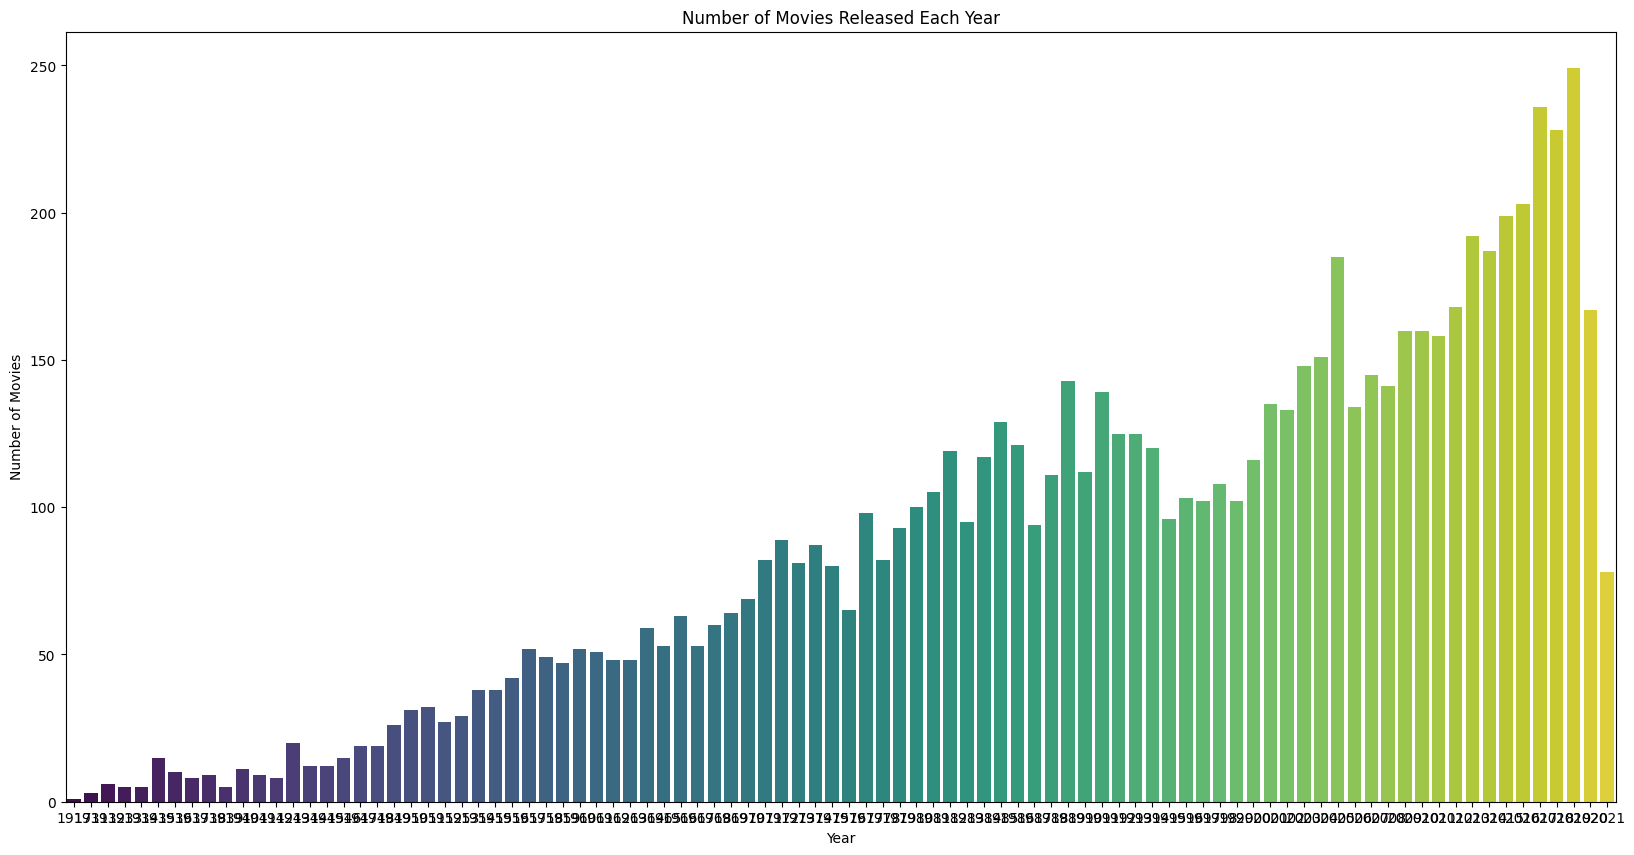

In [13]:
plt.figure(figsize=(20,10))

year_counts = df['Year'].value_counts().sort_index()
years=year_counts.index

sns.barplot(x=years, y=year_counts, palette='viridis')

plt.title('Number of Movies Released Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.show()

Text(0.5, 1.0, 'Percentage Composition of Each Genre')

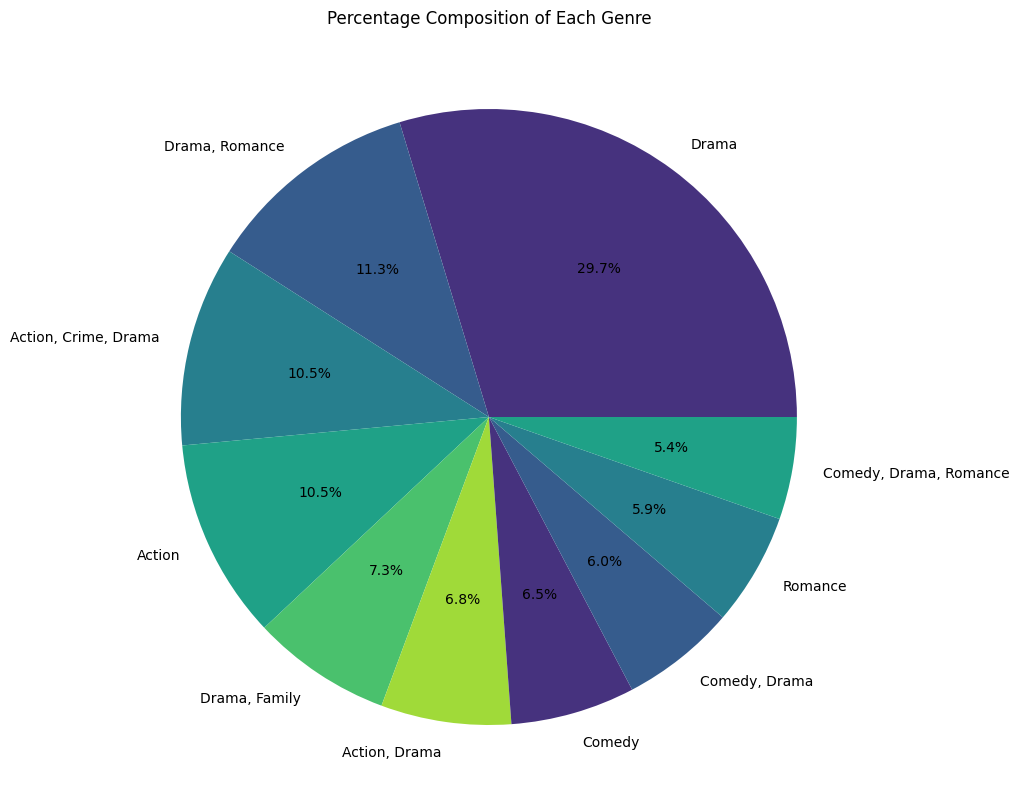

In [14]:
#create a pie chart displaying the genre,showcasing the percentage composition of the 25 first genre using sns
plt.figure(figsize=(20,10))
genre_counts = df['Genre'].value_counts().head(10)
genres = genre_counts.index
plt.pie(genre_counts, labels=genres, autopct='%1.1f%%', startangle=0, colors=sns.color_palette('viridis'))
plt.title('Percentage Composition of Each Genre')


In [15]:
#use plotly to generate a scatter plot of the relationship between the Rating and the Votes of the movies
import plotly.express as px
px.scatter(df, x='Rating', y='Votes',color='Rating',color_continuous_scale='Plasma', title='<b>Relationship between Rating and Votes')

In [16]:
px.scatter(df, x='Rating', y='Duration',color='Rating',color_continuous_scale='Plasma', title='<b>Relationship between Rating and Duration')

>Building the model

In [20]:
Genre_mean_Rating=df.groupby('Genre')['Rating'].transform('mean')
df['Genre_mean_Rating']=Genre_mean_Rating
#crete new csv file
df.to_csv('IMDb-Dataset-Cleaned.csv', index=False)

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
df=pd.read_csv('IMDb-Dataset-Cleaned.csv')
df['Director_encoded']=df.groupby('Director')['Rating'].transform('mean')
df['Actor_encoded']=df.groupby('Actor 1')['Rating'].transform('mean')

from sklearn.impute import SimpleImputer
from sklearn.impute import SimpleImputer
df=pd.read_csv('IMDb-Dataset-Cleaned.csv')
df['Director_encoded']=df.groupby('Director')['Rating'].transform('mean')
df['Actor_encoded']=df.groupby('Actor 1')['Rating'].transform('mean')

#Define the features and target variable
features=['Year','Votes','Duration','Genre_mean_Rating','Director_encoded','Actor_encoded']
# Create an imputer object
imputer = SimpleImputer()

# Fit the imputer on the training data
imputer.fit(x_train)

# Transform the training and test data
x_train = imputer.transform(x_train)
x_test = imputer.transform(x_test)

#Initialize and train a linear Regression model
lr=LinearRegression()
lr.fit(x_train, y_train)

#Make predection on the test set
y_predict=lr.predict(x_test)

#Evaluate the model
mse=mean_squared_error(y_test, y_predict)
mae=mean_absolute_error(y_test,y_predict)
r2=r2_score(y_test,y_predict)

#print the evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")
print(f"R2 Score: {r2}")



Mean Squared Error: 0.5439108837025342
Mean Absolute Error: 0.5407215532783062
R2 Score: 0.7171018439309218


>VIsualise the results

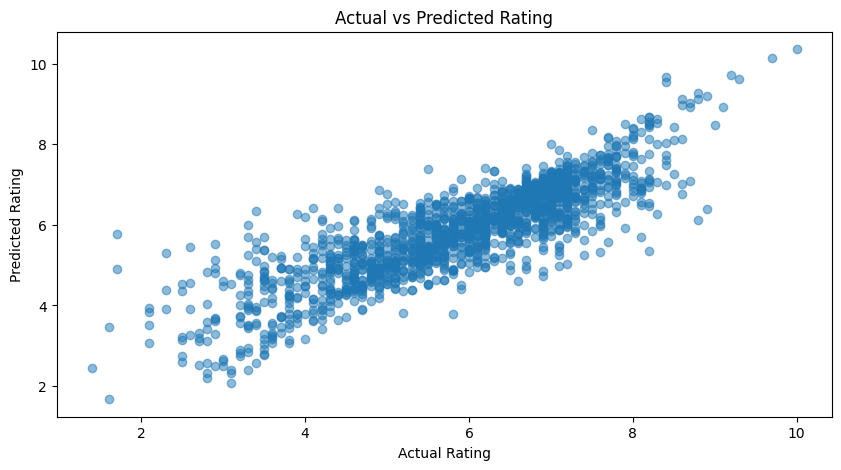

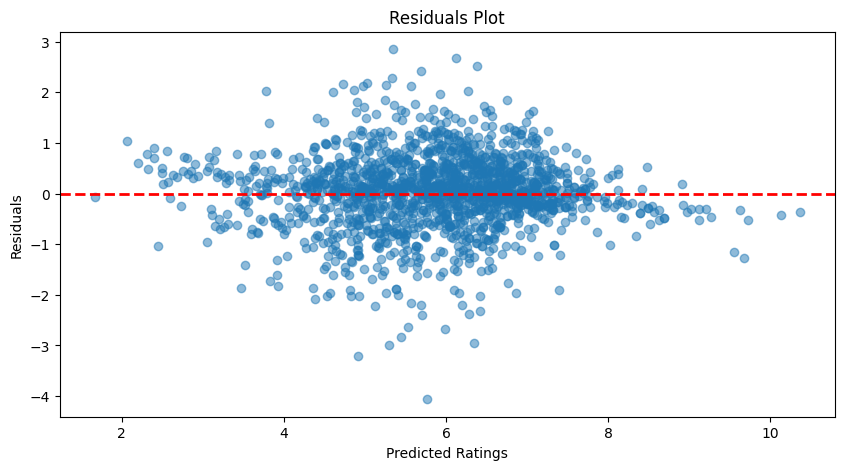

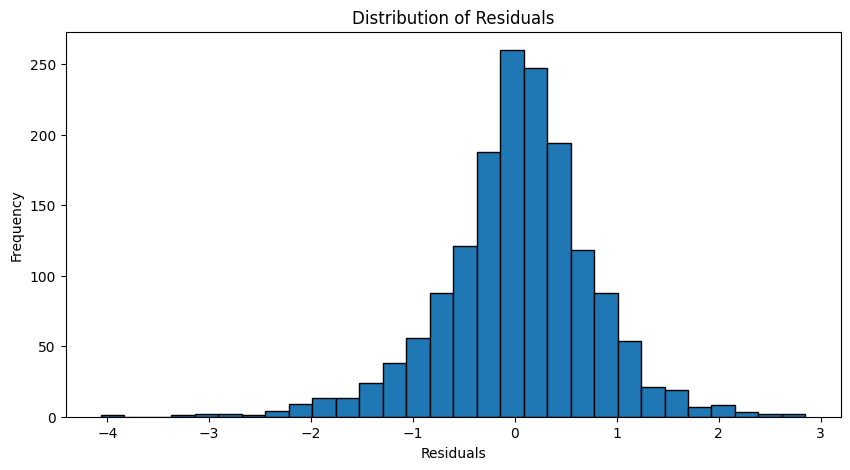

In [29]:
#Scatter plot to compare the actual and predicted ratings in the test set
plt.figure(figsize=(10,5))
plt.scatter(y_test, y_predict,alpha=0.5)
plt.title('Actual vs Predicted Rating')
plt.xlabel('Actual Rating')
plt.ylabel('Predicted Rating')
plt.show()

#Residual plot to assess model's error distribution
residuals=y_test-y_predict
plt.figure(figsize=(10,5))
plt.scatter(y_predict,residuals,alpha=0.5)
plt.title('Residuals Plot')
plt.xlabel('Predicted Ratings')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--',linewidth=2)
plt.show()

#Distribution of Residuals
plt.figure(figsize=(10,5))
plt.hist(residuals,bins=30,edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()
